In [8]:
import sys
sys.path.append(r'\users\jacob\appdata\local\programs\python\python310\lib\site-packages')

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
%matplotlib inline

In [18]:
# Find images, resize, then convert
baseFaces = []

for face in os.listdir('faces'):
    file = os.path.join('faces', face)
    if os.path.isfile(file):
        
        face = cv2.imread(file)
        print(face)
        if str(face) == 'None':
            continue

        resize = cv2.resize(face, dsize=(50,50))
        gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
        np.transpose(gray)
        baseFaces.append(gray)

[[[145 144 153]
  [142 142 151]
  [139 138 147]
  ...
  [150 145 153]
  [142 137 145]
  [135 130 138]]

 [[142 142 151]
  [140 139 148]
  [135 135 144]
  ...
  [155 150 157]
  [149 144 151]
  [144 139 147]]

 [[139 138 147]
  [135 135 144]
  [132 131 140]
  ...
  [160 156 163]
  [159 154 162]
  [157 152 160]]

 ...

 [[172 162 157]
  [171 161 156]
  [170 160 155]
  ...
  [ 57  52  48]
  [ 65  60  56]
  [ 71  66  62]]

 [[167 158 152]
  [168 159 154]
  [171 161 156]
  ...
  [ 62  56  53]
  [ 70  64  61]
  [ 76  70  67]]

 [[164 154 149]
  [167 158 152]
  [173 164 158]
  ...
  [ 64  59  55]
  [ 72  67  63]
  [ 78  73  69]]]
[[[ 66  65  75]
  [ 66  65  75]
  [ 66  65  75]
  ...
  [100  96  91]
  [102  98  93]
  [104 100  95]]

 [[ 67  66  76]
  [ 67  66  76]
  [ 67  66  76]
  ...
  [100  96  91]
  [102  98  93]
  [104 100  95]]

 [[ 69  68  78]
  [ 69  68  78]
  [ 69  68  78]
  ...
  [100  97  89]
  [102  99  91]
  [104 101  93]]

 ...

 [[138 134 139]
  [137 133 138]
  [136 132 137]
  ..

In [19]:
print(baseFaces)

[array([[139, 125, 109, ..., 129, 148, 156],
       [138, 139, 131, ..., 118, 139, 128],
       [130, 127, 128, ..., 117, 126, 141],
       ...,
       [168, 159, 162, ...,  64,  68,  99],
       [156, 150, 165, ...,  48,  47,  44],
       [159, 153, 168, ...,  42,  47,  57]], dtype=uint8), array([[ 80,  80,  63, ..., 102,  95,  97],
       [120, 128, 115, ...,  99,  98, 101],
       [139, 145, 141, ...,  95,  93,  97],
       ...,
       [147, 136, 139, ..., 160, 160, 159],
       [137, 138, 141, ..., 152, 152, 158],
       [129, 127, 119, ..., 149, 149, 153]], dtype=uint8), array([[229, 235, 236, ..., 159, 158, 162],
       [219, 229, 236, ..., 158, 157, 160],
       [201, 213, 217, ..., 154, 159, 159],
       ...,
       [200, 203, 198, ..., 199, 197, 196],
       [196, 197, 200, ..., 199, 197, 199],
       [198, 197, 199, ..., 200, 199, 197]], dtype=uint8), array([[29, 45, 20, ..., 29, 28, 27],
       [29, 45, 29, ..., 25, 24, 27],
       [42, 48, 39, ..., 32, 32, 31],
       ...,


#### Step 5: Represent every image I as a vector T. Now for each image you will have n^2x1 vector where n is 50

In [58]:
nSquared = {}

for key in range(len(baseFaces)):
    vector = np.transpose(baseFaces[key]).reshape(2500, 1)
    nSquared[key] = vector

print(n_squared)

{0: array([[139],
       [138],
       [130],
       ...,
       [ 99],
       [ 44],
       [ 57]], dtype=uint8), 1: array([[ 80],
       [120],
       [139],
       ...,
       [159],
       [158],
       [153]], dtype=uint8), 2: array([[229],
       [219],
       [201],
       ...,
       [196],
       [199],
       [197]], dtype=uint8), 3: array([[29],
       [29],
       [42],
       ...,
       [76],
       [54],
       [60]], dtype=uint8), 4: array([[12],
       [12],
       [25],
       ...,
       [22],
       [13],
       [12]], dtype=uint8), 5: array([[ 84],
       [ 86],
       [ 87],
       ...,
       [147],
       [129],
       [120]], dtype=uint8), 6: array([[253],
       [253],
       [253],
       ...,
       [252],
       [252],
       [252]], dtype=uint8), 7: array([[240],
       [243],
       [242],
       ...,
       [ 16],
       [ 16],
       [ 20]], dtype=uint8), 8: array([[235],
       [234],
       [234],
       ...,
       [231],
       [229],
       [230]],

In [61]:
totalVect = np.concatenate((n_squared[0], n_squared[1], n_squared[2], n_squared[3], n_squared[4], n_squared[5],
                               n_squared[6], n_squared[7], n_squared[8], n_squared[9]), axis=1)
totalVect.shape

(2500, 10)

#### Step-6: compute the face vectors i.e. form a matrix that have each image vector in each column and compute the mean face. Display that face.

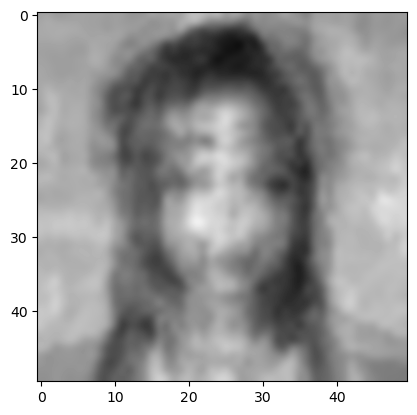

In [62]:
avgVect = np.mean(totalVect, axis=1).reshape(2500, 1)
avgFace = np.transpose(avgVect.reshape(50, 50))
plt.imshow(avgFace, cmap='gray', interpolation='bicubic')
plt.show()


#### Step-7: Subtract the average face vector from the face vectors.

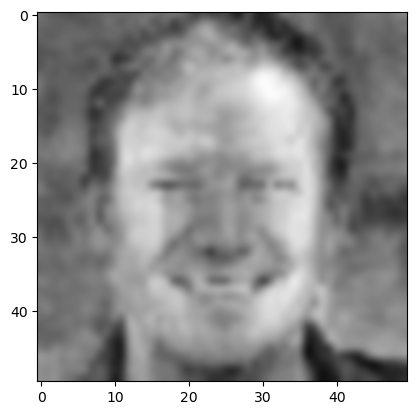

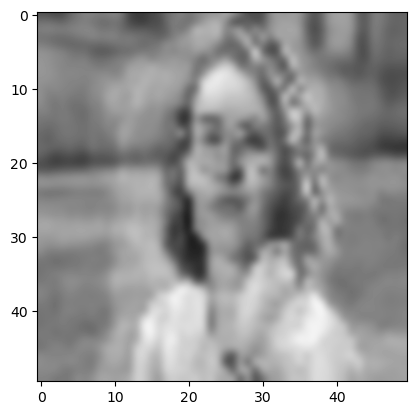

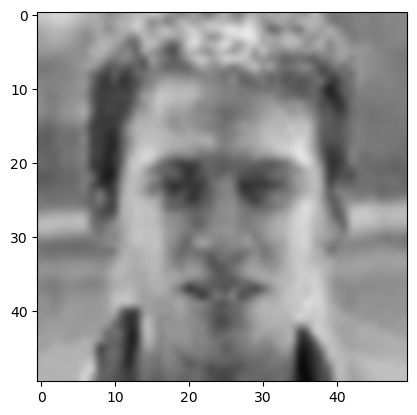

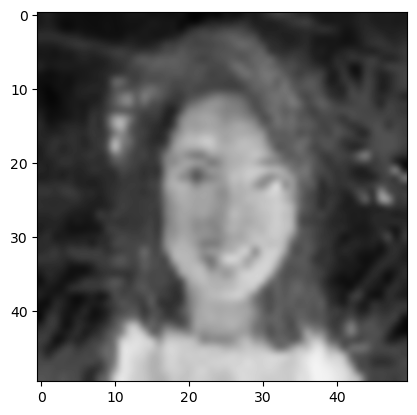

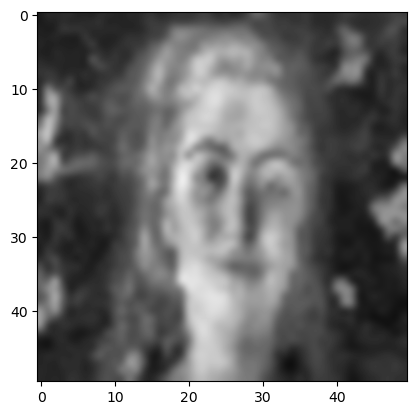

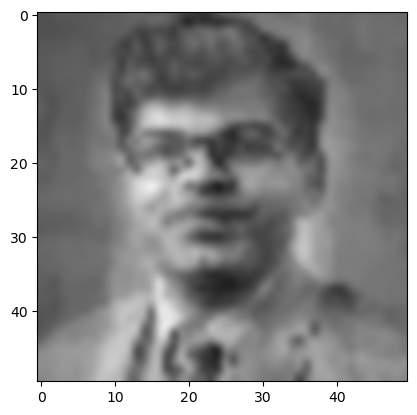

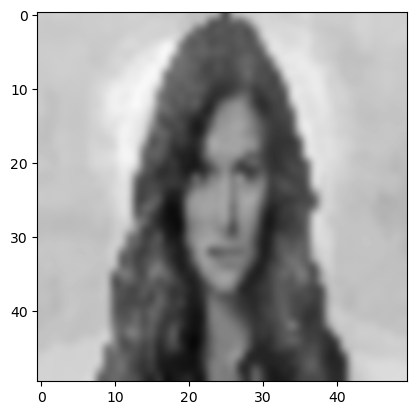

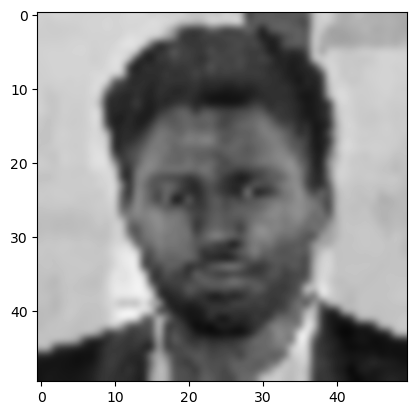

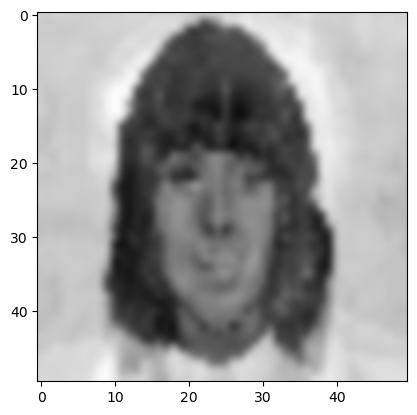

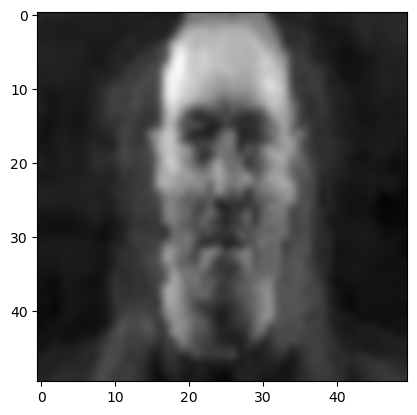

In [39]:
subAvg = []

for i in range(len(baseFaces)):
    subAvg.append(baseFaces[i] - avgFace)

facesDiff = totalVect - avgVect


for j, face in enumerate(subAvg):
    plt.imshow(subAvg[j], cmap='gray', interpolation='bicubic')
    plt.show()


#### Step-8: Calculate the covariance matrix, which results in n x n matrix.

In [40]:
cov = np.cov(np.transpose(facesDiff))
cov.shape

(10, 10)

#### Step-9: Calculate the eigenvalues and eigenvectors from the covariance matrix.

In [41]:
eVals, eVects = np.linalg.eigh(cov)

#### Step-10: Choose the K best eigenvectors from step-9.

In [42]:
best_eVals = np.array((eVals[2], eVals[3], eVals[4]))
best_eVects = np.array((eVects[2], eVects[3], eVects[4]))

#### Step-11: Multiply each eigenvalues i.e. eigen vectors with the (face vector -average face vector) i.e. step-7

In [43]:
mult_eVects = np.transpose((eVects).dot(np.transpose(facesDiff)))
mult_eVects.shape

(2500, 10)

#### Step-12: Graphically display each face with respect to the eigenvalues.

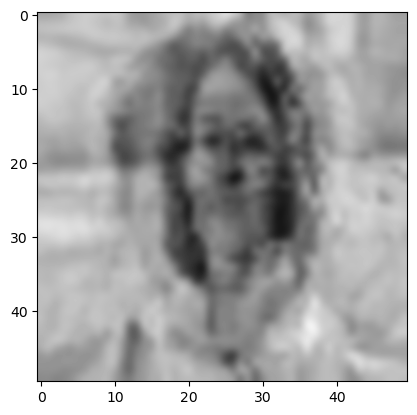

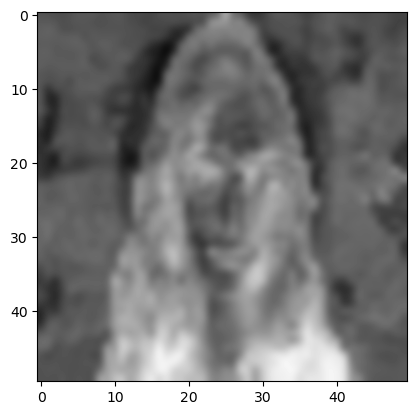

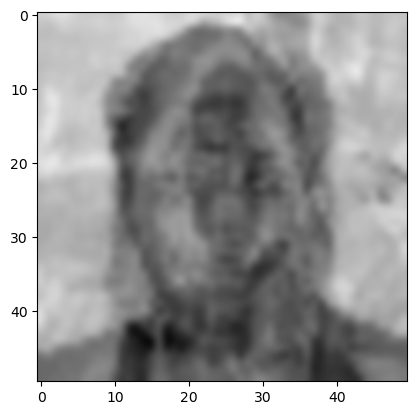

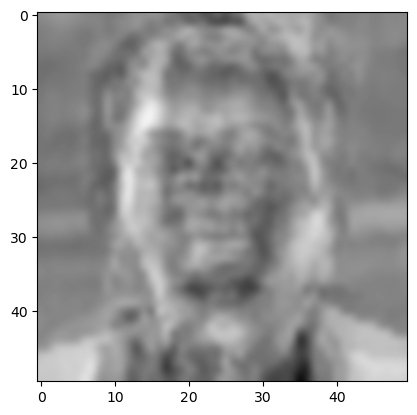

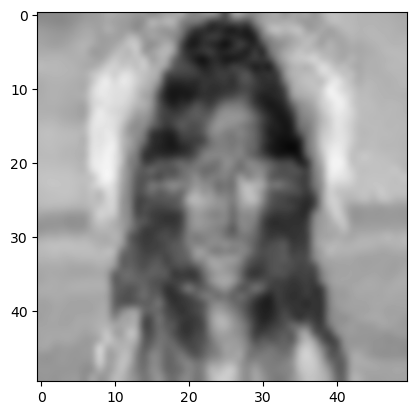

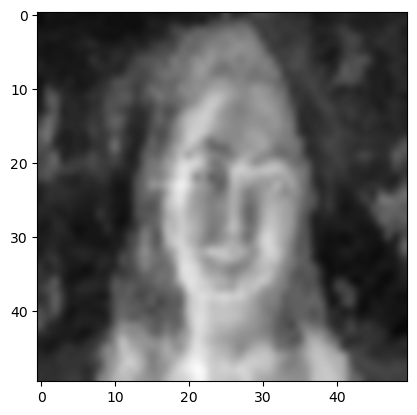

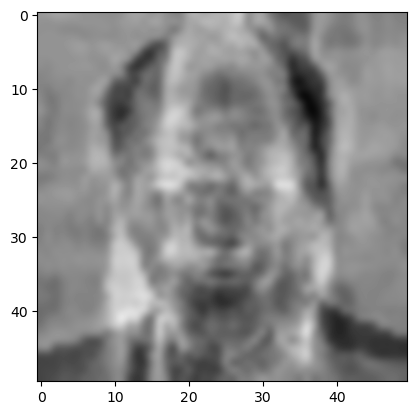

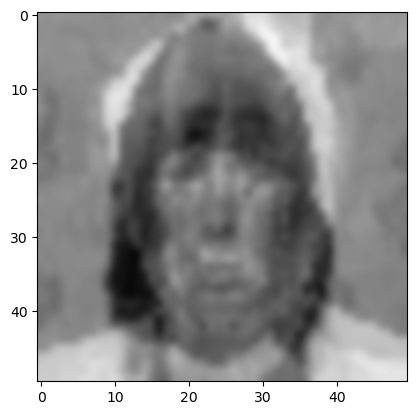

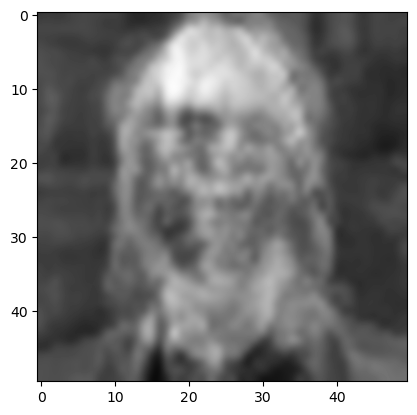

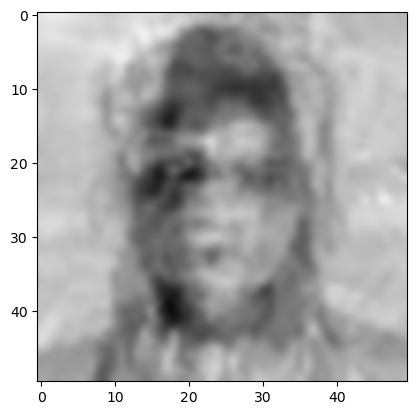

In [63]:
for vect in np.transpose(mult_eVects):
    plt.imshow(np.transpose(vect.reshape(50, 50)), cmap='gray', interpolation='bicubic')
    plt.show()

#### Step-13: Read the test image and separate the face from the image. If you already have a separated face image i.e. image which have a face centered and resized to 50 x 50, you can skip Step-13

This step has been skipped

#### Step-14: Calculate the feature vector of the test face and subtract it with the average face.

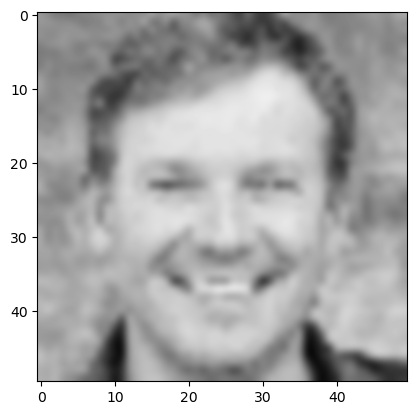

In [45]:
testFace = baseFaces[0]
plt.imshow(testFace, cmap='gray', interpolation='bicubic')

In [65]:
testFace = testFace.reshape(2500,1)
testFaceAvg = testFace - avgVect
testFaceAvg.shape

(2500, 1)

#### Step-15: Project the test image on the eigenspace.

In [48]:
projected = np.transpose(testFace).dot(mult_eVects)

#### Step-16: Calculate the Euclidean distance (e) it with each eigenface vectors.

In [49]:
projectedTransposed = np.transpose(projected)
weight = np.transpose(facesDiff).dot(mult_eVects)

In [51]:
eDist = np.argmin(np.linalg.norm(projectedTransposed - weight, axis=1))
eDist

2

#### The best index is 2, or "face3" in the eigenvectors list